In [ ]:
from agent import *
pd.set_option('display.max_columns', None)

case                = 'swissmetro'   
agent_index         = 1
path_rewards        = 'dgp'
path_choice_dataset = 'swissmetro_process.csv'
path_to_save        = 'experiments/LL_numParams'

state_space_params  = {'num_vars': 5, 'transformations': ['linear', 'log', 'box-cox'], 'taste':['generic', 'specific'], 'covariates': ['age', 'income', 'class', 'ga', 'gender'] }
num_episodes = 50000
attributes          = {1: {1,2,3}, 2: {1, 2, 3, 4}, 3: {1, 2}}
covariates          = {'age': [1,2,3,4,5], 'income': [1,2,3,4], 'class': [0, 1], 'ga': [0, 1], 'gender': [0, 1], 'luggage': [0, 1, 3], 'who': [0, 1, 2, 3]}

reward_weights = {'LLout': 0.7, 'numParams':0.3}
#behavioural_expectation = {1: '-', 2: '-', 3: '-'}

seed = 1234
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)                          
                
agent = DQNLearner(path_rewards, path_choice_dataset, path_to_save, state_space_params, num_episodes, attributes, covariates, 1, min_percentage=1, reward_weights=reward_weights)#, behavioural_expectation=behavioural_expectation

agent.train()
analyzer = AgentAnalyzer(agent)
analyzer.plot_q_distribution(save_path=os.path.join(agent.subfolder, "q_values_distribution.png"))
analyzer.plot_action_entropy(save_path=os.path.join(agent.subfolder, "action_entropy.png"))
analyzer.plot_best_candidate_trajectory(save_dir=agent.subfolder)




2025-06-04 18:22:23,220 [INFO] Initializing DQNLearner
2025-06-04 18:22:23,226 [INFO] Number of CPUs: 11
2025-06-04 18:22:23,228 [INFO] State space parameters: {'num_vars': 4, 'transformations': ['linear', 'log', 'box-cox'], 'taste': ['generic', 'specific'], 'covariates': []}
2025-06-04 18:22:23,230 [INFO] Number of episodes: 50000
2025-06-04 18:22:23,231 [INFO] Batch size: 64
2025-06-04 18:22:23,231 [INFO] Buffer size: 10000
2025-06-04 18:22:23,231 [INFO] Target update frequency: 10
2025-06-04 18:22:23,232 [INFO] Replay buffer size: 10000
2025-06-04 18:22:23,301 [INFO] Folder experiments/pareto_adj_rho2_expectation_final_no_min already exists
2025-06-04 18:22:23,305 [INFO] Number of files in the folder: 2
2025-06-04 18:22:23,308 [INFO] Creating subfolder experiments/pareto_adj_rho2_expectation_final_no_min/iteration_3
2025-06-04 18:22:23,315 [INFO] Number of episodes: 50000 | Number of batches: 781
2025-06-04 18:22:23,329 [INFO] Training agent 1
2025-06-04 18:22:23,333 [INFO] Training

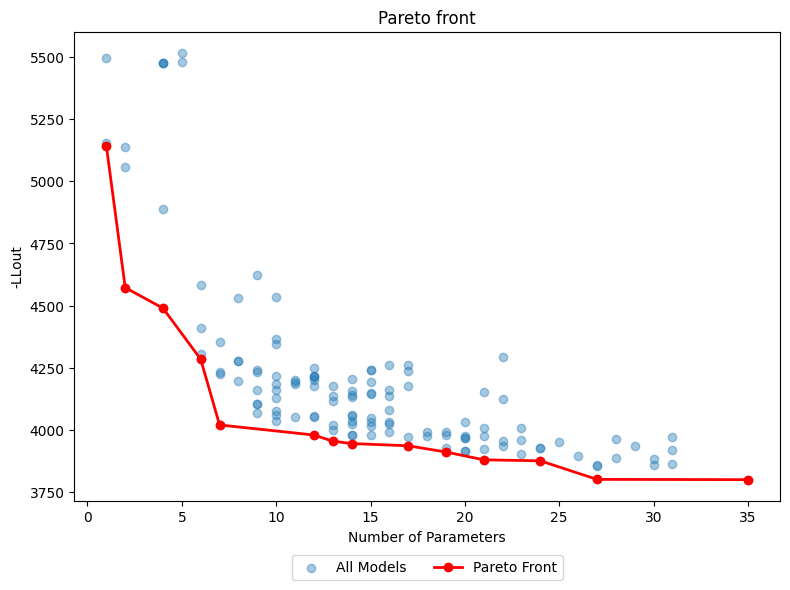

In [2]:
from agent import ParetoFrontAnalyzer

training_log_path = "experiments/LL_numParams/iteration_5/training_log.csv"
reward_path = "dgp/outputs/rewards.csv"
output_path = "experiments/LL_numParams/iteration_5/pareto_front.png"

ParetoFrontAnalyzer.plot_pareto_front(training_log_path, reward_path, output_path, metric_col='LLout')